# Detecção de Fraudes em Cartões de Crédito com Machine Learning

## Objetivo
Construir um modelo de machine learning para identificar transações fraudulentas em cartões de crédito, maximizando o desempenho em um cenário de dados desbalanceados. Sendo o objetivo aplicar uma combinação de abordagens para otimizar o modelo e garantir a capacidade de identificar fraudes com precisão.

## Descrição do Dataset
O dataset contém transações de cartão de crédito, sendo a classe "fraude" uma pequena porcentagem do total, o que cria um cenário de dados desbalanceados. A classe minoritária representa transações fraudulentas, enquanto a classe majoritária representa transações legítimas.


In [5]:
# importa creditcard.csv
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Show columns
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# Contagem de registros
print(data.shape)

# contagem de registros por classe
print(data['Class'].value_counts())

(1759, 31)
Class
0    1267
1     492
Name: count, dtype: int64


## Técnicas aplicadas

1. Seleção de Atributos (Feature Selection)
2. Técnicas de Balanceamento (Sampling)
3. Tuning de Hiperparâmetros
4. Ensemble de Modelos

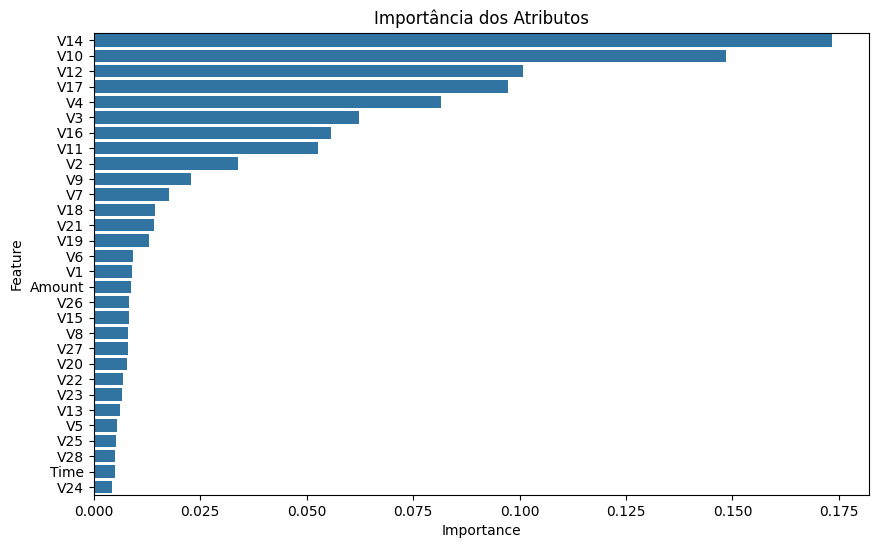

Atributos selecionados: ['V14', 'V10', 'V12', 'V17', 'V4', 'V3', 'V16', 'V11', 'V2', 'V9']


In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separar as features e o target
X = data.drop('Class', axis=1)
y = data['Class']

# Treinar um modelo de RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obter a importância dos atributos
importances = model.feature_importances_

# Criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar as importâncias dos atributos
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importância dos Atributos')
plt.show()

# Selecionar os atributos mais importantes (por exemplo, os 10 mais importantes)
selected_features = feature_importances['Feature'].head(10).tolist()
X_selected = X[selected_features]

print("Atributos selecionados:", selected_features)


In [10]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Verificar a distribuição das classes antes do balanceamento
print("Distribuição das classes antes do balanceamento:", Counter(y))

# Aplicar o Random Oversampling para balancear as classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:", Counter(y_resampled))

Distribuição das classes antes do balanceamento: Counter({0: 1267, 1: 492})
Distribuição das classes após o balanceamento: Counter({0: 1267, 1: 1267})


Aplicar Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Usar os atributos selecionados
X_selected = X[selected_features]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicar o Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Mostrar os melhores hiperparâmetros
print("Melhores hiperparâmetros do Grid Search:", grid_search.best_params_)

# Avaliar o modelo com os melhores hiperparâmetros
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Melhores hiperparâmetros do Grid Search: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       378
           1       0.98      0.98      0.98       383

    accuracy                           0.98       761
   macro avg       0.98      0.98      0.98       761
weighted avg       0.98      0.98      0.98       761



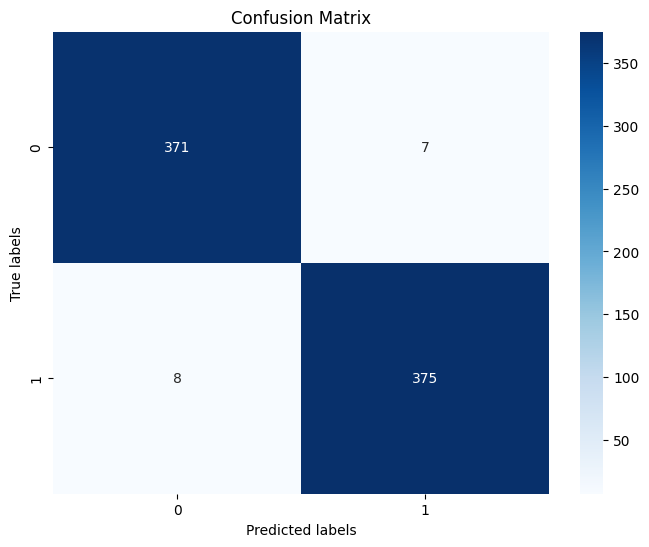

In [15]:
# Matriz de Confusão: para entender quais classes específicas estão sendo mal classificadas, caso haja alguma fraqueza específica.
# Análise de Erros por Classe: isso ajuda a entender se algumas classes específicas precisam de mais amostras ou ajustes

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Random Search

Seleciona aleatoriamente combinações de hiperparâmetros dentro de um intervalo definido. Isso reduz o tempo necessário em comparação ao Grid Search e, em alguns casos, consegue resultados comparáveis ou melhores, já que explora mais variedade de configurações em menos tempo.

bootstrap=False: A amostragem dos dados foi configurada para não usar bootstrap.
max_depth=100: A profundidade máxima das árvores de decisão foi configurada para 100.
min_samples_leaf=4: O número mínimo de amostras em cada folha foi configurado para 4.
min_samples_split=10: O número mínimo de amostras necessárias para dividir um nó foi configurado para 10.
n_estimators=800: O número de árvores no ensemble foi configurado para 800.

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report

# Carregar o dataset
data = pd.read_csv('creditcard.csv')

# Definir X e y
X = data.drop('Class', axis=1)
y = data['Class']

# Selecionar os atributos mais importantes (por exemplo, os 10 mais importantes)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
selected_features = feature_importances['Feature'].head(10).tolist()

# Usar os atributos selecionados
X_selected = X[selected_features]

# Verificar a distribuição das classes antes do balanceamento
print("Distribuição das classes antes do balanceamento:", Counter(y))

# Aplicar o Random Oversampling para balancear as classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:", Counter(y_resampled))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Definir o modelo
model = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros para o Random Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Aplicar o Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Avaliar o modelo com os melhores hiperparâmetros
best_random = random_search.best_estimator_
y_pred = best_random.predict(X_test)
print(classification_report(y_test, y_pred))

Distribuição das classes antes do balanceamento: Counter({0: 1267, 1: 492})
Distribuição das classes após o balanceamento: Counter({0: 1267, 1: 1267})
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   2.2s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   2.2s
[CV] END bootstrap=True, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   2.1s
[CV] END bootstrap=False, max_depth=110, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_spli

## Bayesian Optimization

Usa técnicas probabilísticas para escolher a próxima combinação de hiperparâmetros baseada em resultados anteriores. É mais eficiente e tende a encontrar bons valores de hiperparâmetros com menos iterações, sendo muito útil para modelos complexos ou onde o custo computacional é uma preocupação.

In [16]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Carregar o dataset
data = pd.read_csv('creditcard.csv')

# Definir X e y
X = data.drop('Class', axis=1)
y = data['Class']

# Selecionar os atributos mais importantes (por exemplo, os 10 mais importantes)
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
selected_features = feature_importances['Feature'].head(10).tolist()

# Usar os atributos selecionados
X_selected = X[selected_features]

# Verificar a distribuição das classes antes do balanceamento
print("Distribuição das classes antes do balanceamento:", Counter(y))

# Aplicar o Random Oversampling para balancear as classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:", Counter(y_resampled))

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Definir o modelo
model = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros para a Otimização Bayesiana
param_space = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(10, 110),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': [True, False]
}

# Aplicar a Otimização Bayesiana
bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Mostrar os melhores hiperparâmetros
print("Melhores hiperparâmetros da Otimização Bayesiana:", bayes_search.best_params_)

# Avaliar o modelo com os melhores hiperparâmetros
best_bayes = bayes_search.best_estimator_
y_pred = best_bayes.predict(X_test)
print(classification_report(y_test, y_pred))

Distribuição das classes antes do balanceamento: Counter({0: 1267, 1: 492})
Distribuição das classes após o balanceamento: Counter({0: 1267, 1: 1267})
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=True, max_depth=83, min_samples_leaf=4, min_samples_split=5, n_estimators=703; total time=   1.1s
[CV] END bootstrap=True, max_depth=83, min_samples_leaf=4, min_samples_split=5, n_estimators=703; total time=   1.1s
[CV] END bootstrap=True, max_depth=83, min_samples_leaf=4, min_samples_split=5, n_estimators=703; total time=   1.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END bootstrap=False, max_depth=98, min_samples_leaf=2, min_samples_split=10, n_estimators=878; total time=   1.8s
[CV] END bootstrap=False, max_depth=98, min_samples_leaf=2, min_samples_split=10, n_estimators=878; total time=   1.9s
[CV] END bootstrap=False, max_depth=98, min_samples_leaf=2, min_samples_split=10, n_estimators=878; total time=   1.9s
Fitting 3 folds for eac

# Avaliação / Análise
Avalie o desempenho do seu modelo final usando métricas adequadas para dados desbalanceados:

- Acurácia 
- Macro Avg F1-Score: Para equilibrar precisão e recall entre as classes.
- Matriz de Confusão: Avaliar acertos e erros por classe para identificar padrões de erro.

Mostrar quais técnicas foram aplicadas e quais abordagens mais contribuíram para o aumento do desempenho. Apresentando o impacto do desbalanceamento das classes e como as técnicas escolhidas afetaram o modelo.